##Importing Libraries

In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
import seaborn as sns
from itertools import cycle
color_cycle = cycle(plt.rcParams['axes.prop_cycle'].by_key()['color'])
%matplotlib inline

## Data loading and overview

<font color='cyan'>Let's start by reading in the Diabetes Health Indicators Dataset csv file into a pandas dataframe.</font>

In [2]:
df = pd.read_csv("/content/drive/Shareddrives/my_workspace/Diabetes_assignment/diabetes_012_health_indicators_BRFSS2015.csv")

In [3]:
##shape of the dataset
print(f'The dataset has {df.shape[0]} rows and {df.shape[1]} columns.') 

The dataset has 253680 rows and 22 columns.


In [4]:
#print first five rows
df.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [5]:
#Check the info of the data set which describes null values, data type, memory usage
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

``float64`` is the data types of our features. We can easily see if there are any missing values. Here, there are none because each column contains 253680 observations, the same number of rows we saw before with shape

In [6]:
df.describe()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.296921,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.698160,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,2.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


> <font color='cyan'>  Check the description of the data set which describes the minimum value, maximum value, mean value, total count, standard deviation etc. and visualise the Diabetes of how many persons have diabetes or how many persons have no diabetes and how many have pre-diabetes. </font>

# Exploratory Data Analysis

<font color='cyan'>In this section, we will be doing some basic Exploratory Data Analysis to get the "feel" of the data, we will be checking the distributions, the correlations etc of the different columns</font>

### Missing Data

<font color='cyan'>We can use seaborn to create a simple heatmap to see where we are missing data!</font>

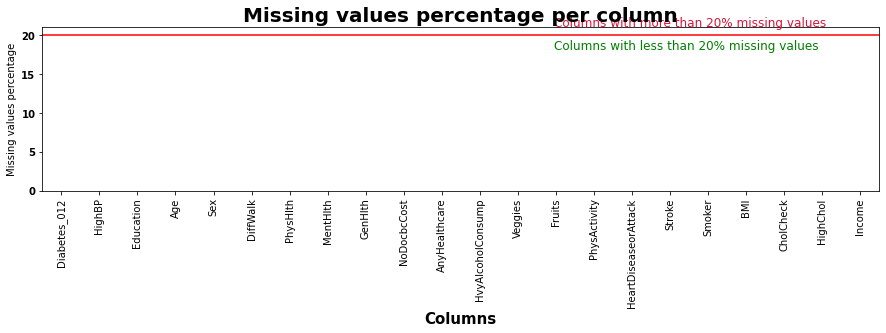

In [7]:
def msv_1(df, thresh = 20, color = 'black', edgecolor = 'black', height = 3, width = 15):
    
    plt.figure(figsize = (width, height))
    percentage = (df.isnull().mean()) * 100
    percentage.sort_values(ascending = False).plot.bar(color = color, edgecolor = edgecolor)
    plt.axhline(y = thresh, color = 'r', linestyle = '-')
    
    plt.title('Missing values percentage per column', fontsize=20, weight='bold' )
    
    plt.text(len(df.isnull().sum()/len(df))/1.7, thresh+2.5, f'Columns with more than {thresh}% missing values', fontsize=12, color='crimson',
         ha='left' ,va='top')
    plt.text(len(df.isnull().sum()/len(df))/1.7, thresh - 0.5, f'Columns with less than {thresh}% missing values', fontsize=12, color='green',
         ha='left' ,va='top')
    plt.xlabel('Columns', size=15, weight='bold')
    plt.ylabel('Missing values percentage')
    plt.yticks(weight ='bold')
    
    return plt.show()
msv_1(df, 20, color=sns.color_palette('Reds',15))

In [8]:
print(f'There are {df.isnull().any().sum()} columns in diabetes dataset with missing values.')

There are 0 columns in diabetes dataset with missing values.


> Here from the above code we first checked that is there any null values from the IsNull() function then we are going to take the sum of all those missing values from the sum() function and the inference we now get is that there are no missing values.



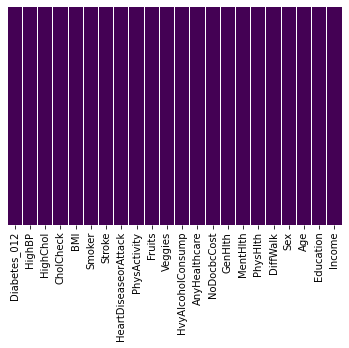

In [9]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

> <font color='cyan'><font>Roughly no data is missing.

Let's continue on by visualizing some more of the data! Check out the video for full explanations over these plots, this code is just to serve as reference.

## Data Exploration

### Counts How many have diabetes or not

In [10]:
#Renaming Diabetes type from int to string for better consistency
df['Diabetes_012_str'] = df['Diabetes_012'].replace({0.0:'Healthy', 1.0:'Pre-diabetic', 2.0:'Diabetic'})

> 213703 persons out of 253680 are ``Healthy``; 35346 have ``diabetic`` and rest of 4631 have ``Pre-diabetic`` phase. 

In [11]:
countHealthy = len(df[df.Diabetes_012 == 0])
countHavePreDiabetic = len(df[df.Diabetes_012 == 1])
countDiabteic = len(df[df.Diabetes_012 == 2])
print("Percentage of Patients Are Healthy: {:.2f}%".format((countHealthy / (len(df.Diabetes_012))*100)))
print("Percentage of Patients Have Pre-Diabetic: {:.2f}%".format((countHavePreDiabetic / (len(df.Diabetes_012))*100)))
print("Percentage of Patients Have Diabetic: {:.2f}%".format((countDiabteic / (len(df.Diabetes_012))*100)))

Percentage of Patients Are Healthy: 84.24%
Percentage of Patients Have Pre-Diabetic: 1.83%
Percentage of Patients Have Diabetic: 13.93%


> * We have 213703 persons out of 253680 are Healthy; 35346 have diabetic and rest of 4631 have Pre-diabetic phase, so our problem is imbalanced.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


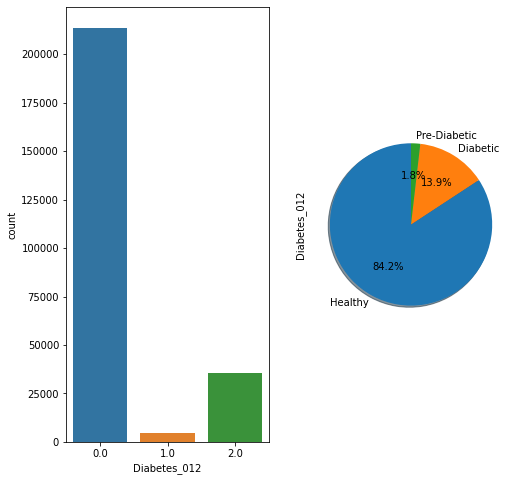

In [12]:
# countplot----Plot the frequency of the Diabetes_012

fig1, ax1 = plt.subplots(1,2,figsize=(8,8))

#It shows the count of observations in each categorical bin using bars

sns.countplot(df['Diabetes_012'],ax=ax1[0])

#Find the % of diabetic and Healthy person

labels = 'Healthy','Diabetic', 'Pre-Diabetic'

df.Diabetes_012.value_counts().plot.pie(labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)

### Plots to analyze the Dataset 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff739db79d0>,
      dtype=object)

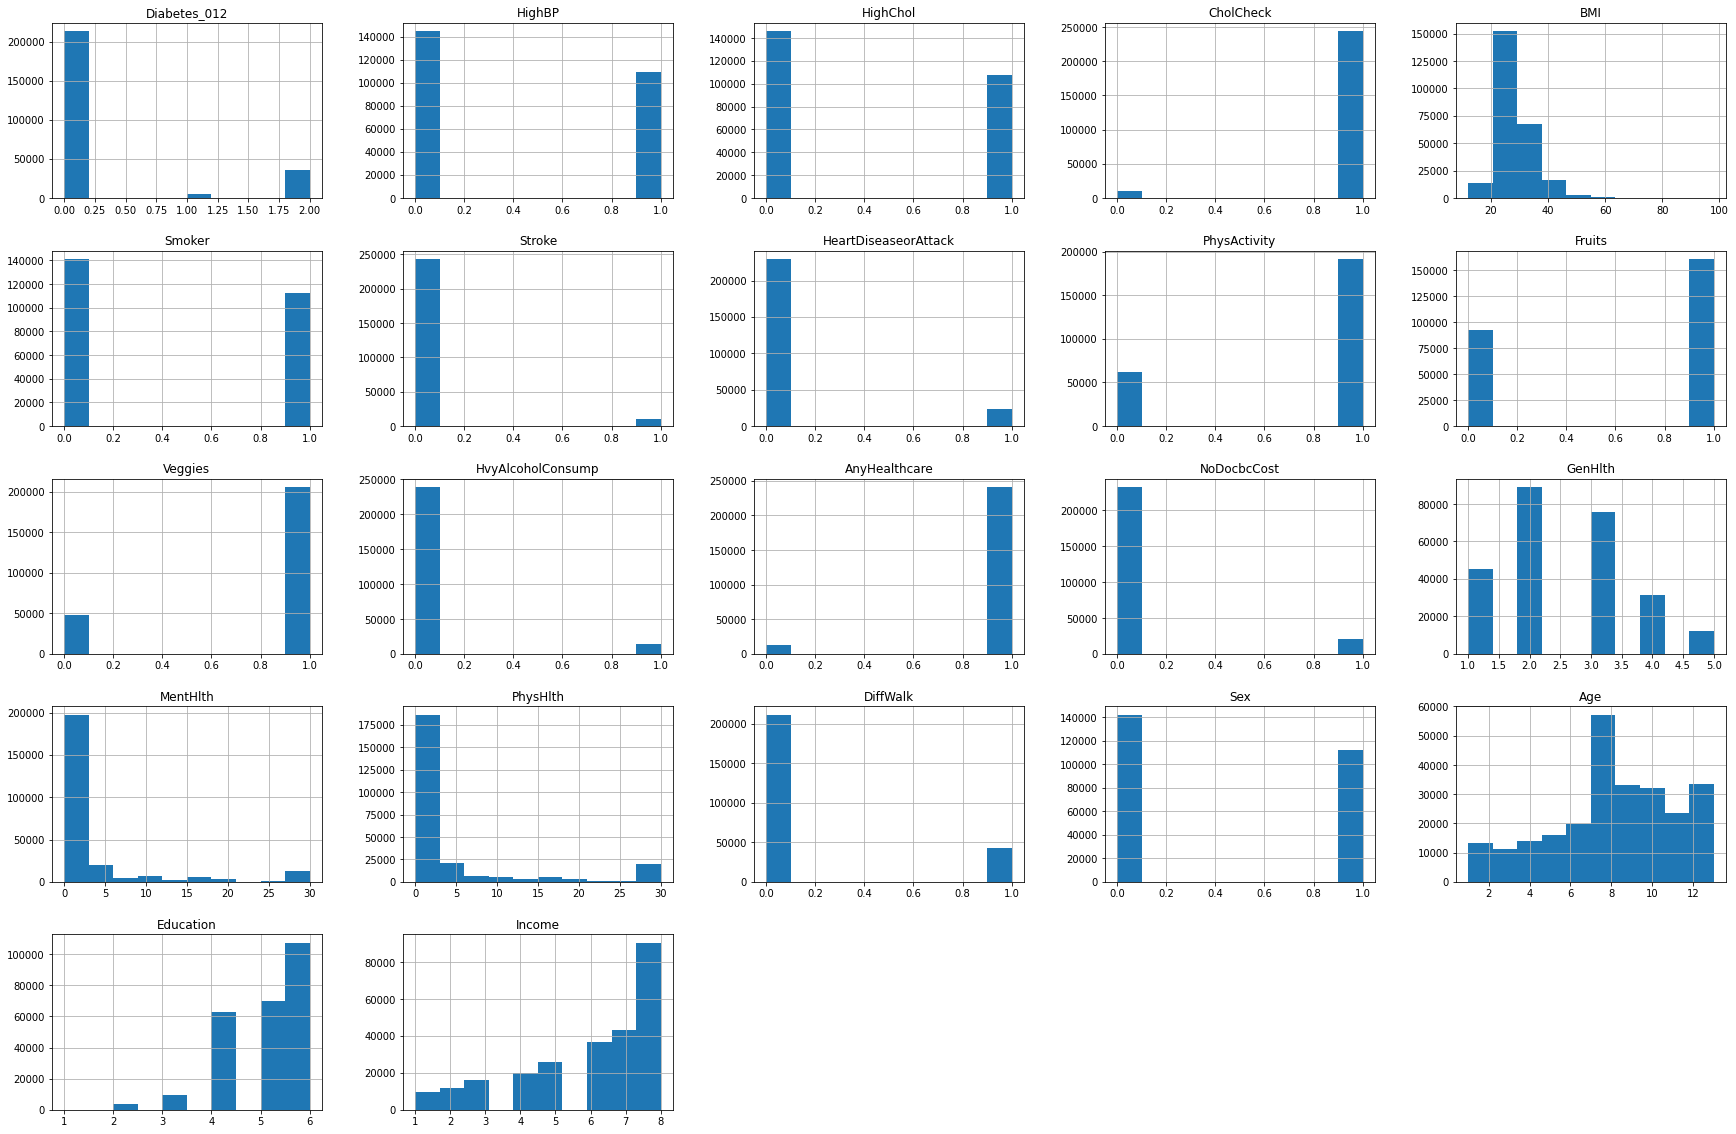

In [13]:
# Histogram 

df.hist(figsize=(30,20))

> From the above HIstogram we can easily visualize that these ```'BMI', 'GenHlth', 'MentHlth', 'PhysHlth', 'Age','Education', 'Income'```  variables are continuous and the rest of the variable are dicrete data. 

### **Correlation with Target**

In [14]:
df_corr = df.corr().transpose()
df_corr

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
Diabetes_012,1.000000,0.271596,0.209085,0.067546,0.224379,0.062914,0.107179,0.180272,-0.121947,-0.042192,...,0.015410,0.035436,0.302587,0.073507,0.176287,0.224239,0.031040,0.185026,-0.130517,-0.171483
HighBP,0.271596,1.000000,0.298199,0.098508,0.213748,0.096991,0.129575,0.209361,-0.125267,-0.040555,...,0.038425,0.017358,0.300530,0.056456,0.161212,0.223618,0.052207,0.344452,-0.141358,-0.171235
HighChol,0.209085,0.298199,1.000000,0.085642,0.106722,0.091299,0.092620,0.180765,-0.078046,-0.040859,...,0.042230,0.013310,0.208426,0.062069,0.121751,0.144672,0.031205,0.272318,-0.070802,-0.085459
CholCheck,0.067546,0.098508,0.085642,1.000000,0.034495,-0.009929,0.024158,0.044206,0.004190,0.023849,...,0.117626,-0.058255,0.046589,-0.008366,0.031775,0.040585,-0.022115,0.090321,0.001510,0.014259
BMI,0.224379,0.213748,0.106722,0.034495,1.000000,0.013804,0.020153,0.052904,-0.147294,-0.087518,...,-0.018471,0.058206,0.239185,0.085310,0.121141,0.197078,0.042950,-0.036618,-0.103932,-0.100069
Smoker,0.062914,0.096991,0.091299,-0.009929,0.013804,1.000000,0.061173,0.114441,-0.087401,-0.077666,...,-0.023251,0.048946,0.163143,0.092196,0.116460,0.122463,0.093662,0.120641,-0.161955,-0.123937
Stroke,0.107179,0.129575,0.092620,0.024158,0.020153,0.061173,1.000000,0.203002,-0.069151,-0.013389,...,0.008776,0.034804,0.177942,0.070172,0.148944,0.176567,0.002978,0.126974,-0.076009,-0.128599
HeartDiseaseorAttack,0.180272,0.209361,0.180765,0.044206,0.052904,0.114441,0.203002,1.000000,-0.087299,-0.019790,...,0.018734,0.031000,0.258383,0.064621,0.181698,0.212709,0.086096,0.221618,-0.099600,-0.141011
PhysActivity,-0.121947,-0.125267,-0.078046,0.004190,-0.147294,-0.087401,-0.069151,-0.087299,1.000000,0.142756,...,0.035505,-0.061638,-0.266186,-0.125587,-0.219230,-0.253174,0.032482,-0.092511,0.199658,0.198539
Fruits,-0.042192,-0.040555,-0.040859,0.023849,-0.087518,-0.077666,-0.013389,-0.019790,0.142756,1.000000,...,0.031544,-0.044243,-0.103854,-0.068217,-0.044633,-0.048352,-0.091175,0.064547,0.110187,0.079929


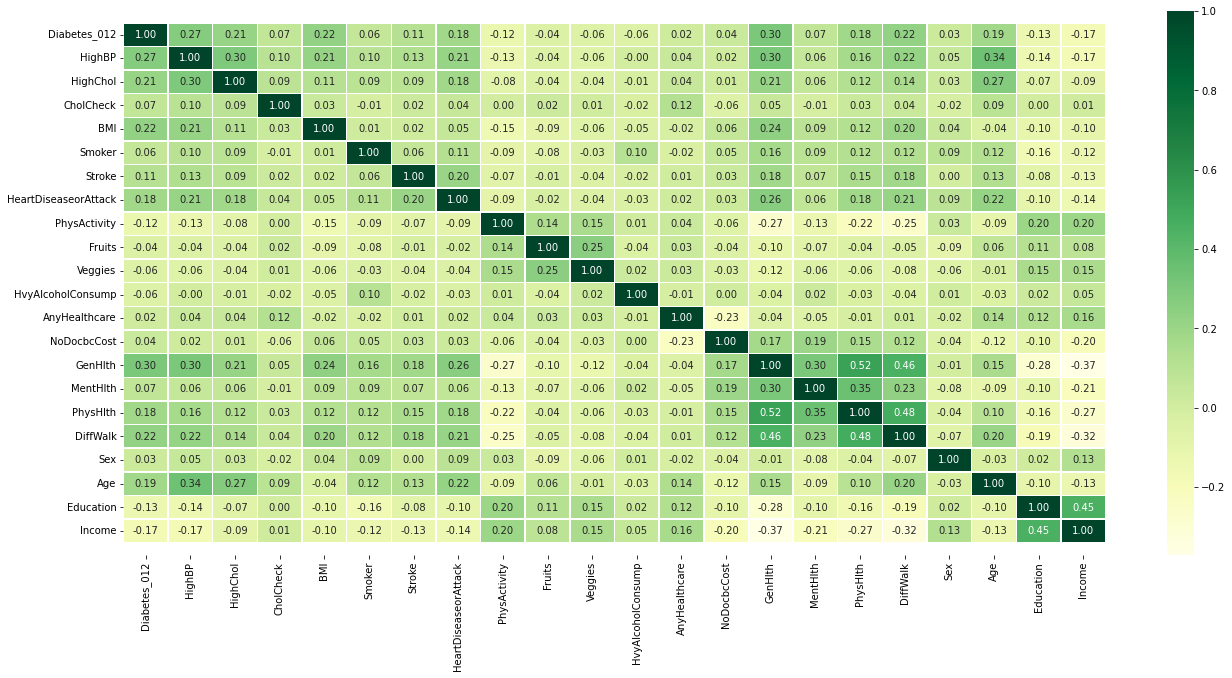

In [15]:
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(22, 10))
ax = sns.heatmap(corr_matrix,annot=True,linewidths=0.5,fmt=".2f",cmap="YlGn");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5);

The correlation plot shows the relation between the parameters.


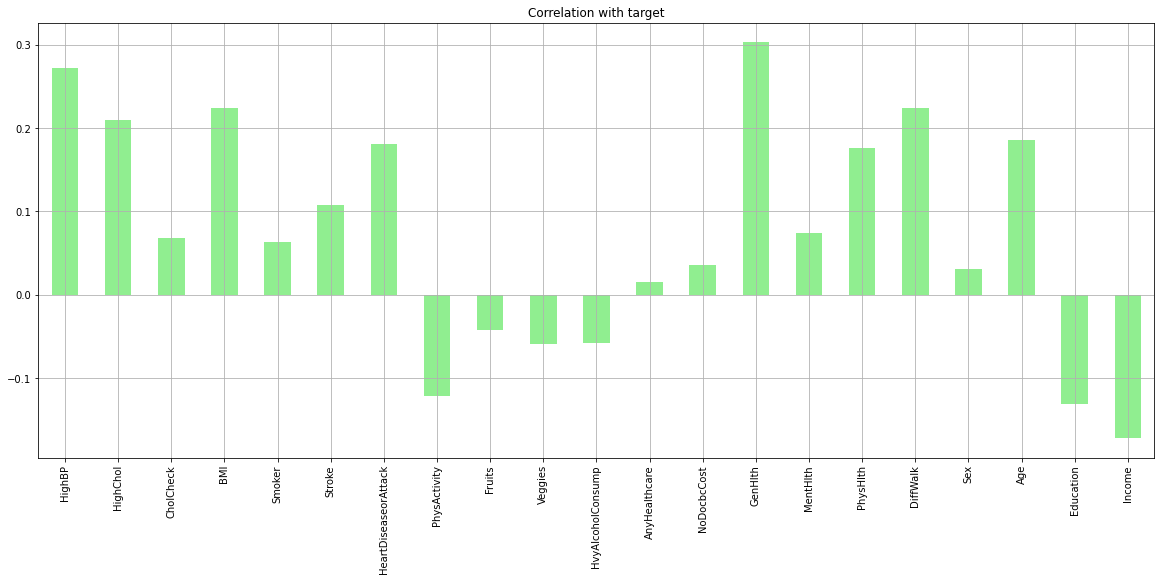

In [16]:
df.drop('Diabetes_012', axis=1).corrwith(df.Diabetes_012).plot(kind='bar', grid=True, figsize=(20, 8), title="Correlation with target",color="lightgreen");

---
***Observations from correlation:***
- *``AnyHealthCare``, ``NoDocbcCost`` and ``Sex`` are the least correlated with the target variable.*
- *All other variables have a significant correlation with the target variable.*
---


### Relationship Between Age vs Diabetes

In [17]:
def mean_target(var):
    """
    A function that will return the mean values for 'var' column depending on whether the person
    is diabetic or not
    """
    return pd.DataFrame(df.groupby('Diabetes_012_str').count()[var])

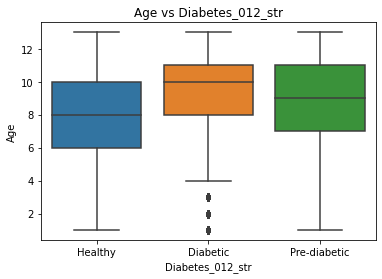

In [18]:
sns.boxplot(x = 'Diabetes_012_str', y = 'Age', data = df)
plt.title('Age vs Diabetes_012_str')
plt.show()

> We know that as the age increases, the chances of diabetes also commonly increases. From above we can say, the median of the age of diabetic people is greater than that of non-diabetic people.

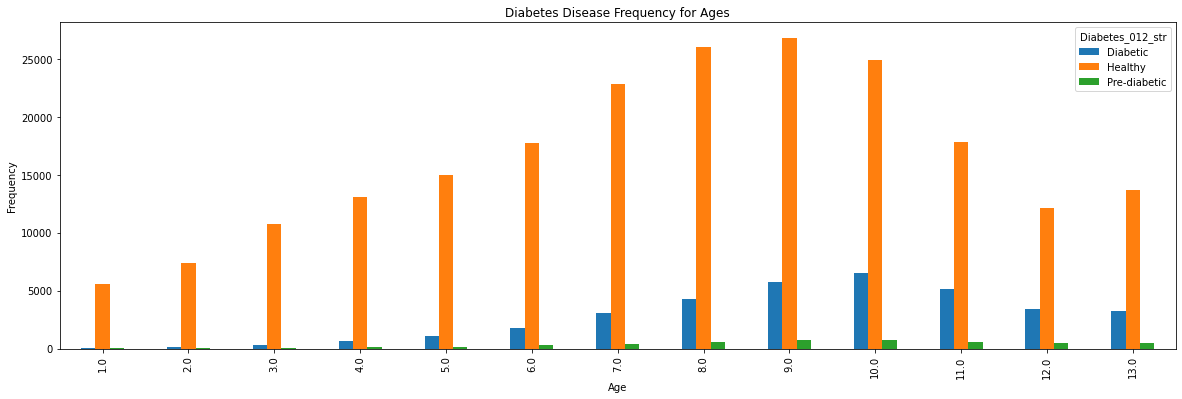

In [19]:
pd.crosstab(df.Age,df.Diabetes_012_str).plot(kind="bar",figsize=(20,6))
plt.title('Diabetes Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [20]:
pd.crosstab(df["Diabetes_012_str"], df["Age"])

Age,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
Diabetes_012_str,,,,,,,,,,,,,
Diabetic,78,140,314,626,1051,1742,3088,4263,5733,6558,5141,3403,3209
Healthy,5601,7404,10737,13055,14943,17765,22808,26019,26809,24939,17790,12132,13701
Pre-diabetic,21,54,72,142,163,312,418,550,702,697,602,445,453


In [21]:
mean_target("Age")

,Age
Diabetes_012_str,
Diabetic,35346
Healthy,213703
Pre-diabetic,4631


> As we can see, age has a significant impact on diabetic disease, with the greatest impact occurring between the ages of 9 and 10.

### Relationship Between Smoker vs Diabetes

Text(0.5, 1.0, 'Diabetes Frequency for Smoker')

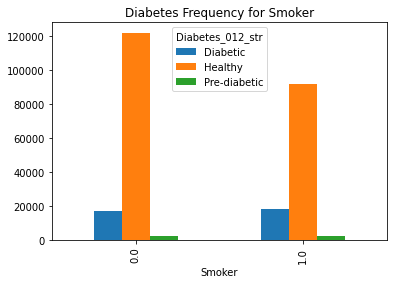

In [22]:
pd.crosstab(df.Smoker, df.Diabetes_012_str).plot(kind = 'bar')
plt.title("Diabetes Frequency for Smoker")

In [23]:
mean_target("Smoker")

,Smoker
Diabetes_012_str,
Diabetic,35346
Healthy,213703
Pre-diabetic,4631


In [24]:
pd.crosstab(df["Diabetes_012_str"], df["Smoker"])

Smoker,0.0,1.0
Diabetes_012_str,,
Diabetic,17029,18317
Healthy,121879,91824
Pre-diabetic,2349,2282


> According to the table, persons with diabetes are the most likely to smoke.

### Relationship Between Sex and Diabetes

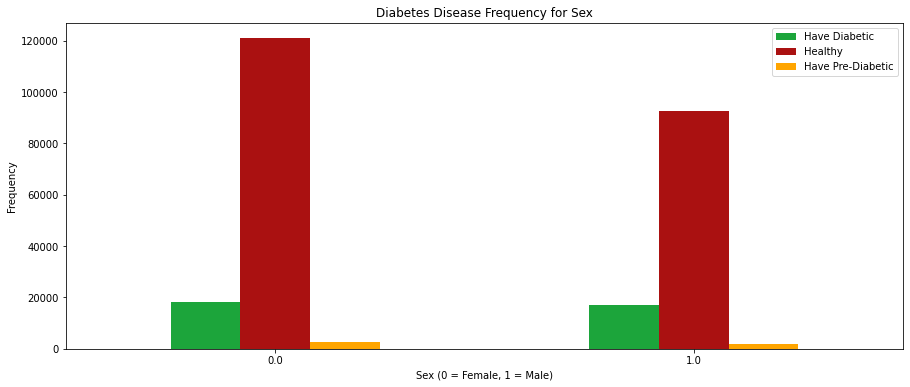

In [25]:
pd.crosstab(df.Sex,df.Diabetes_012_str).plot(kind="bar",figsize=(15,6),color=['#1CA53B','#AA1111', '#FFA500' ])
plt.title('Diabetes Disease Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Have Diabetic", "Healthy", "Have Pre-Diabetic"])
plt.ylabel('Frequency')
plt.show()

In [26]:
mean_target("Sex")

,Sex
Diabetes_012_str,
Diabetic,35346
Healthy,213703
Pre-diabetic,4631


In [27]:
pd.crosstab(df["Diabetes_012_str"], df["Sex"])

Sex,0.0,1.0
Diabetes_012_str,,
Diabetic,18411,16935
Healthy,120959,92744
Pre-diabetic,2604,2027


> We can see that women are not just more diabetic than men, but they are also healthier.

### Relationship Between HighBP and Diabetes

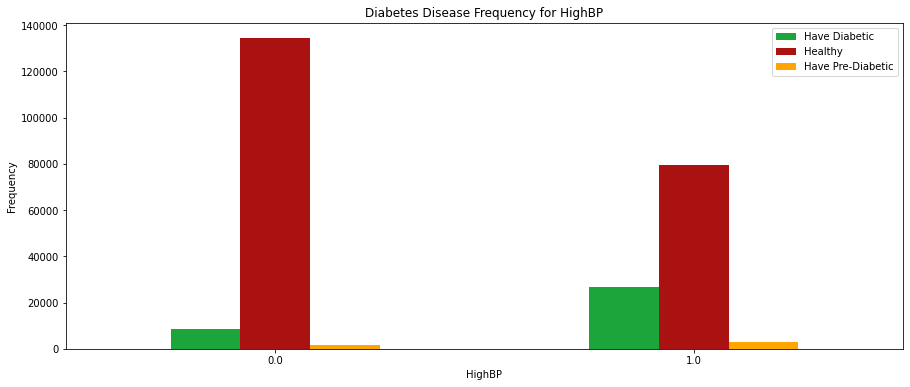

In [28]:
pd.crosstab(df.HighBP,df.Diabetes_012_str).plot(kind="bar",figsize=(15,6),color=['#1CA53B','#AA1111', '#FFA500' ])
plt.title('Diabetes Disease Frequency for HighBP')
plt.xlabel('HighBP')
plt.xticks(rotation=0)
plt.legend(["Have Diabetic", "Healthy", "Have Pre-Diabetic"])
plt.ylabel('Frequency')
plt.show()

In [29]:
mean_target("HighBP")

,HighBP
Diabetes_012_str,
Diabetic,35346
Healthy,213703
Pre-diabetic,4631


In [30]:
pd.crosstab(df["Diabetes_012_str"], df["HighBP"])

HighBP,0.0,1.0
Diabetes_012_str,,
Diabetic,8742,26604
Healthy,134391,79312
Pre-diabetic,1718,2913


> People with high blood pressure are more likely to have diabetes.

### Relationship Between HighChol and Diabetes

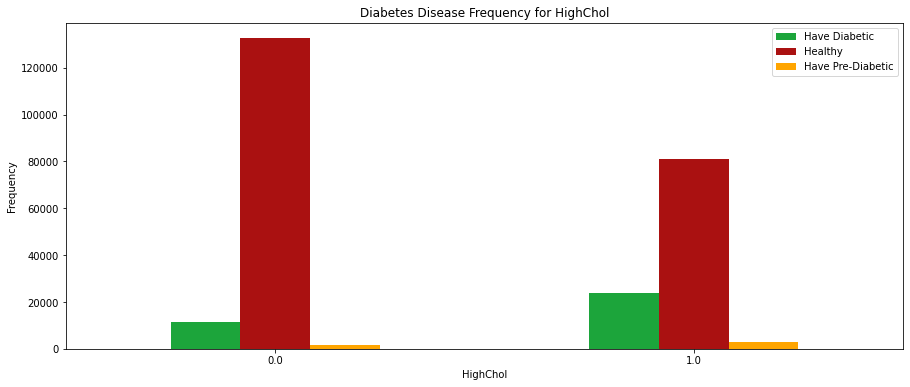

In [31]:
pd.crosstab(df.HighChol,df.Diabetes_012_str).plot(kind="bar",figsize=(15,6),color=['#1CA53B','#AA1111', '#FFA500' ])
plt.title('Diabetes Disease Frequency for HighChol')
plt.xlabel('HighChol')
plt.xticks(rotation=0)
plt.legend(["Have Diabetic", "Healthy", "Have Pre-Diabetic"])
plt.ylabel('Frequency')
plt.show()

In [32]:
mean_target("HighChol")

,HighChol
Diabetes_012_str,
Diabetic,35346
Healthy,213703
Pre-diabetic,4631


In [33]:
pd.crosstab(df["Diabetes_012_str"], df["HighChol"])

HighChol,0.0,1.0
Diabetes_012_str,,
Diabetic,11660,23686
Healthy,132673,81030
Pre-diabetic,1756,2875


> People with high high cholesterol are more likely to have diabetes.

### Relationship Between BMI and Diabetes



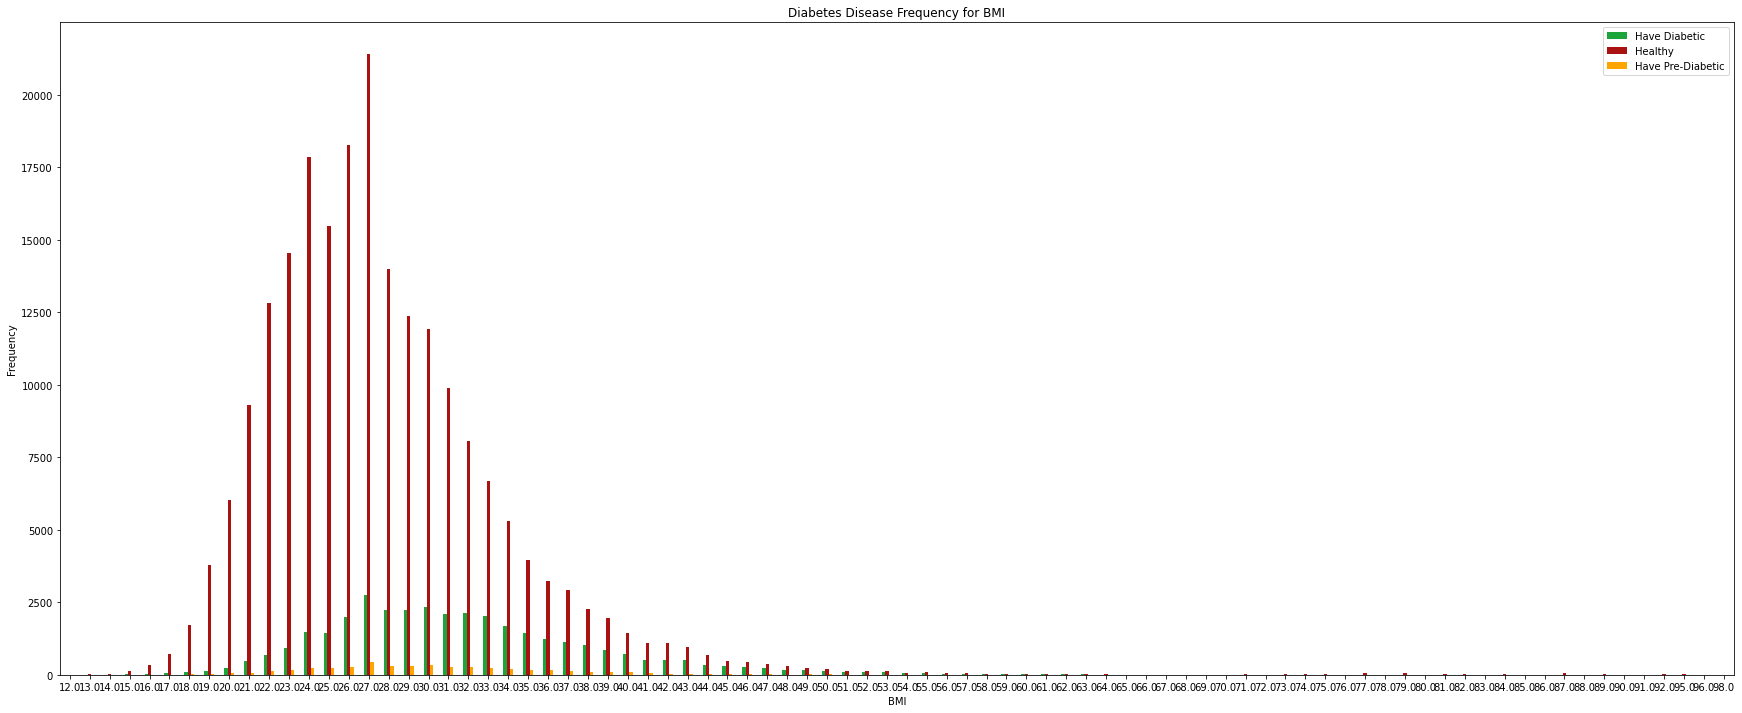

In [34]:
pd.crosstab(df.BMI,df.Diabetes_012_str).plot(kind="bar",figsize=(30,12),color=['#1CA53B','#AA1111', '#FFA500' ])
plt.title('Diabetes Disease Frequency for BMI')
plt.xlabel('BMI')
plt.xticks(rotation=0)
plt.legend(["Have Diabetic", "Healthy", "Have Pre-Diabetic"])
plt.ylabel('Frequency')
plt.show()

In [35]:
pd.crosstab(df["Diabetes_012_str"], df["BMI"])

BMI,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,...,86.0,87.0,88.0,89.0,90.0,91.0,92.0,95.0,96.0,98.0
Diabetes_012_str,,,,,,,,,,,,,,,,,,,,,
Diabetic,0,2,4,12,20,48,83,135,241,479,...,0,9,0,3,0,0,5,1,0,3
Healthy,6,18,36,120,326,719,1705,3795,6039,9301,...,1,52,2,25,1,1,27,11,0,4
Pre-diabetic,0,1,1,0,2,9,15,38,47,75,...,0,0,0,0,0,0,0,0,1,0


In [36]:
mean_target("BMI")

,BMI
Diabetes_012_str,
Diabetic,35346
Healthy,213703
Pre-diabetic,4631


> As we can see people range between 24-33 BMI have more likely to have Diabetic.

### Relationship Between MentlHlth and Diabetes



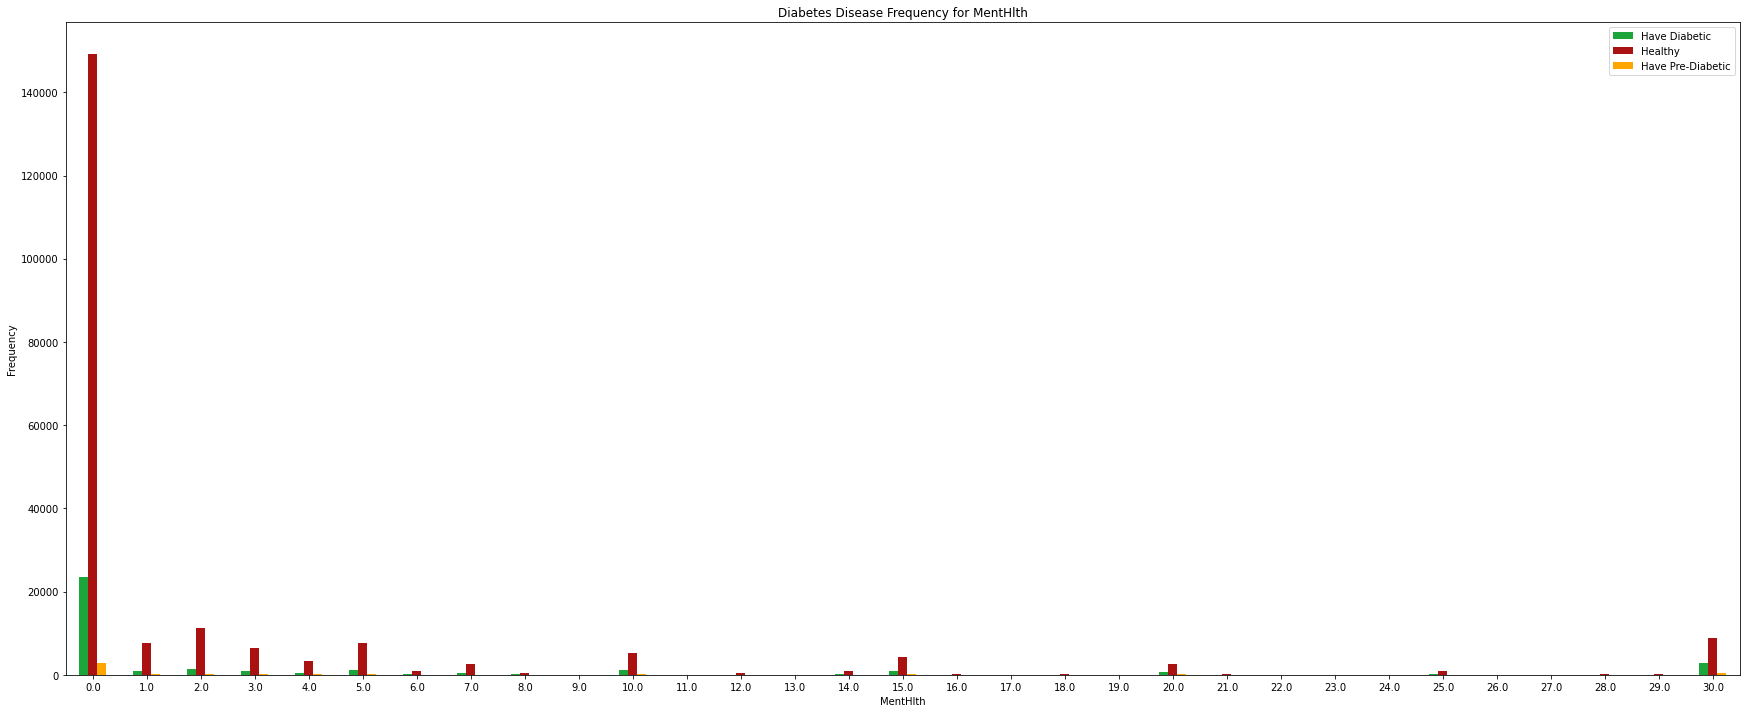

In [37]:
pd.crosstab(df.MentHlth,df.Diabetes_012_str).plot(kind="bar",figsize=(30,12),color=['#1CA53B','#AA1111', '#FFA500' ])
plt.title('Diabetes Disease Frequency for MentHlth')
plt.xlabel('MentHlth')
plt.xticks(rotation=0)
plt.legend(["Have Diabetic", "Healthy", "Have Pre-Diabetic"])
plt.ylabel('Frequency')
plt.show()

In [38]:
pd.crosstab(df["Diabetes_012_str"], df["BMI"])

BMI,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,...,86.0,87.0,88.0,89.0,90.0,91.0,92.0,95.0,96.0,98.0
Diabetes_012_str,,,,,,,,,,,,,,,,,,,,,
Diabetic,0,2,4,12,20,48,83,135,241,479,...,0,9,0,3,0,0,5,1,0,3
Healthy,6,18,36,120,326,719,1705,3795,6039,9301,...,1,52,2,25,1,1,27,11,0,4
Pre-diabetic,0,1,1,0,2,9,15,38,47,75,...,0,0,0,0,0,0,0,0,1,0


In [39]:
mean_target("MentHlth")

,MentHlth
Diabetes_012_str,
Diabetic,35346
Healthy,213703
Pre-diabetic,4631


> From figure we can say that Menthlth Group 0-5 have impact on Diabetic

### Relationship Between Income and Diabetes



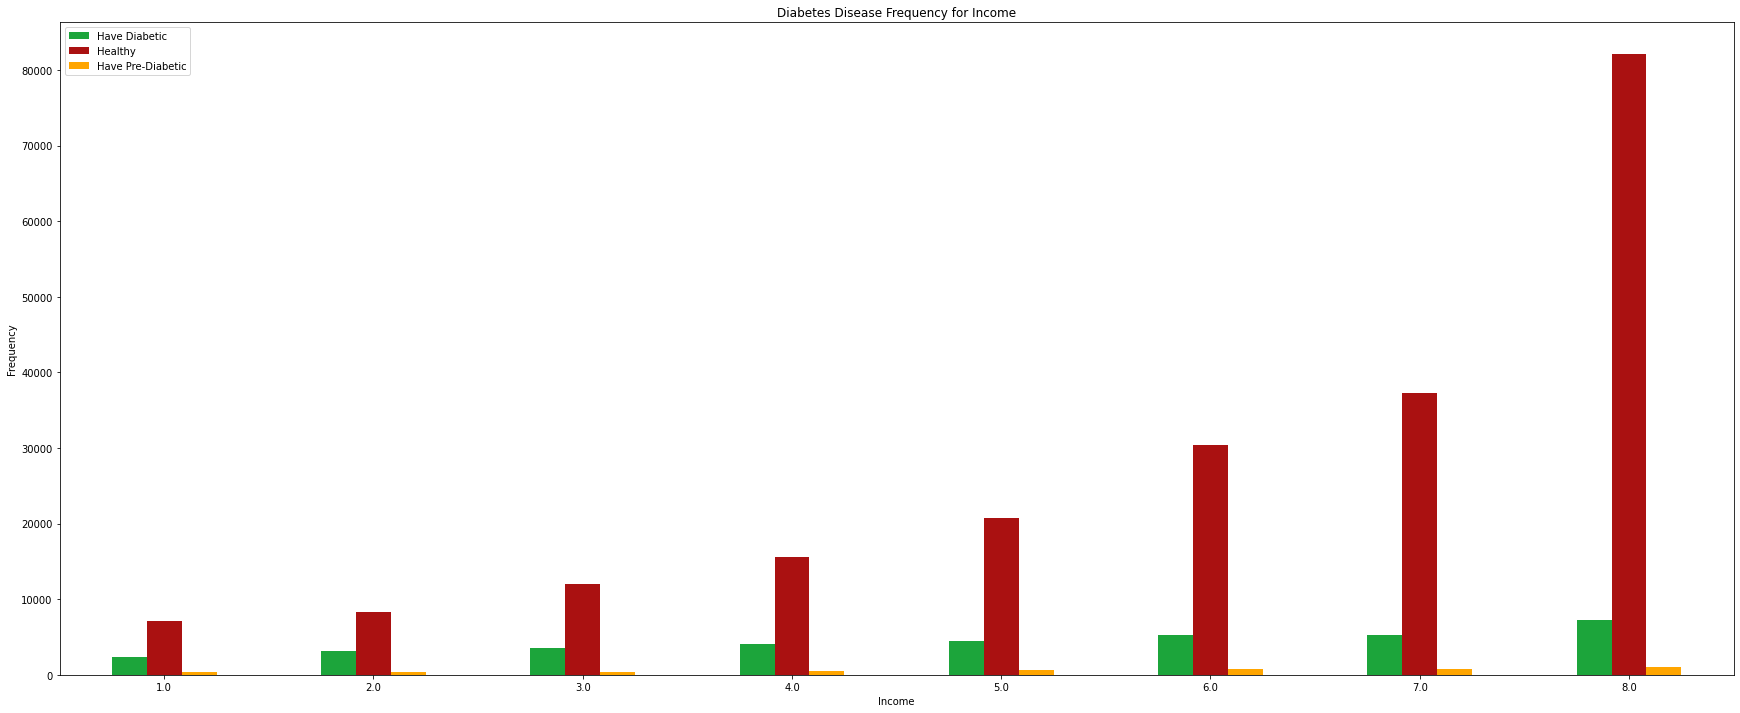

In [40]:
pd.crosstab(df.Income,df.Diabetes_012_str).plot(kind="bar",figsize=(30,12),color=['#1CA53B','#AA1111', '#FFA500' ])
plt.title('Diabetes Disease Frequency for Income')
plt.xlabel('Income')
plt.xticks(rotation=0)
plt.legend(["Have Diabetic", "Healthy", "Have Pre-Diabetic"])
plt.ylabel('Frequency')
plt.show()

In [41]:
mean_target("Income")

,Income
Diabetes_012_str,
Diabetic,35346
Healthy,213703
Pre-diabetic,4631


In [42]:
pd.crosstab(df["Diabetes_012_str"], df["Income"])

Income,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0
Diabetes_012_str,,,,,,,,
Diabetic,2383,3086,3568,4054,4504,5291,5265,7195
Healthy,7114,8341,12005,15622,20792,30431,37219,82179
Pre-diabetic,314,356,421,459,587,748,735,1011


>  We can deduce from the table that persons with greater income have more Diabetic than those with lower income.

In [43]:
df.groupby('Diabetes_012_str').mean()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
Diabetes_012_str,,,,,,,,,,,,,,,,,,,,,
Diabetic,2.0,0.752674,0.670118,0.993182,31.944011,0.518220,0.092457,0.222882,0.630538,0.585441,...,0.959769,0.105868,3.290981,4.461806,7.954479,0.371216,0.479121,9.379053,4.745516,5.210094
Healthy,0.0,0.371132,0.379171,0.957104,27.742521,0.429680,0.031628,0.071833,0.779077,0.643023,...,0.949739,0.079610,2.372391,2.944404,3.582416,0.132282,0.433985,7.786559,5.106629,6.208663
Pre-diabetic,1.0,0.629022,0.620816,0.986612,30.724466,0.492766,0.057223,0.143382,0.678471,0.602246,...,0.945152,0.129346,2.975599,4.529907,6.348305,0.277478,0.437702,9.083351,4.784496,5.351112


### In this section we will see the continuous variable have *Outliers* or not.

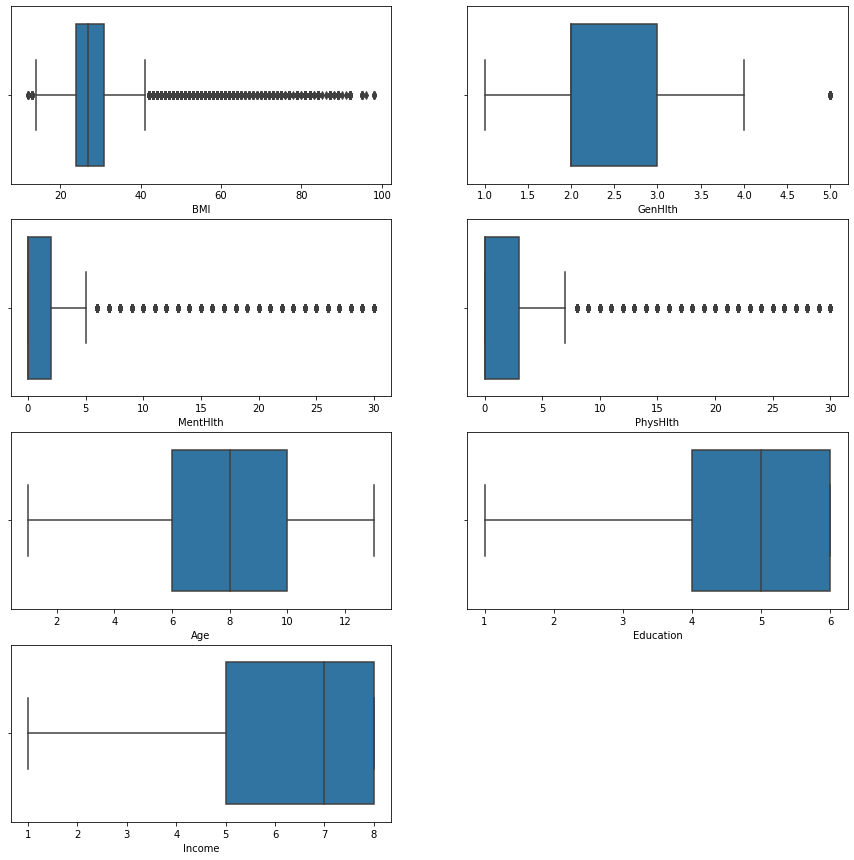

In [44]:
plt.figure(figsize = (15,15))
for i,col in enumerate(['BMI', 'GenHlth', 'MentHlth', 'PhysHlth', 'Age','Education', 'Income']):
    plt.subplot(4,2,i+1)
    sns.boxplot(x = col, data = df)
plt.show()

> As we can see from the Boxplot ```BMI, GentHlth, MenHlth, PhysHlth``` have some outliers.

> As we can see, the smoker have high effect on Diabetes disease.

In [45]:
mean_target('MentHlth')

,MentHlth
Diabetes_012_str,
Diabetic,35346
Healthy,213703
Pre-diabetic,4631


> The value demonstrates that there is a similar distribution of mental health severity across the diabetes spectrum, implying that mental health does not offer value in terms of clinical scenario.


## Conclusion from EDA



1.   The dataset contains 7 continuos feature variable and 15 Discrete type features variable.
2.   The target feature is ``` Diabetes_012 ```.
3.   ```float64``` is the data types of our features.
4.   The parameters do not contain any null values (missing values).
5.   The ```Diabetes_012``` feature shows that there are 213703 persons out of 253680 are Healthy; 35346 have diabetic and rest of 4631 have Pre-diabetic phase. It means 84.24% people are Healthy
Percentage of Patients Have Pre-Diabetic: 1.83% people are Pre-Diabetic Phase, and 13.93% people Have Diabetic.
6.   There are very less number of outliers in all features.
7.   There is no apparent linear correlation between feature variable according to the heatmap.
8. With age increases, the chances of diabetes also increases.
9. persons with diabetes are the most likely to smoke.
10. women are not just more diabetic than men, but they are also healthier.
11. People with high blood pressure are more likely to have diabetes.
12. People with high high cholesterol are more likely to have diabetes.
13. people range between 24-33 BMI have more likely to have Diabetic.
14. Menthlth Group 0-5 have impact on Diabetic
15.  persons with greater income have more Diabetic than those with lower income.

<font color='yellow'> # Thank You </font>